In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [2]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

Using downloaded and verified file: .\cifar10.tgz


In [3]:
# Extract from archive
with tarfile.open("./cifar10.tgz",'r:gz') as tar:
    tar.extractall(path='./data')

In [4]:
data_dir='./data/cifar10/'
print(os.listdir(data_dir))
classes = os.listdir(data_dir+"/train")
print(classes)

['test', 'train']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print("No. of training examples for airplanes: ",len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes:  5000
['0001.png', '0002.png', '0003.png', '0004.png', '0005.png']


In [6]:
ship_test_files = os.listdir(data_dir+"/test/ship")
print("No. of test examples for ship: ",len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship:  1000
['0001.png', '0002.png', '0003.png', '0004.png', '0005.png']


In [7]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [8]:
dataset= ImageFolder(data_dir+"/train",transform=ToTensor())

In [9]:
len(dataset)

50000

In [10]:
img,label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [11]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor']="#ffffff"

In [13]:
def show_example(img,label):
    print("Label: ", dataset.classes[label],"("+str(label)+")")
    plt.imshow(img.permute(1,2,0))

Label:  airplane (0)


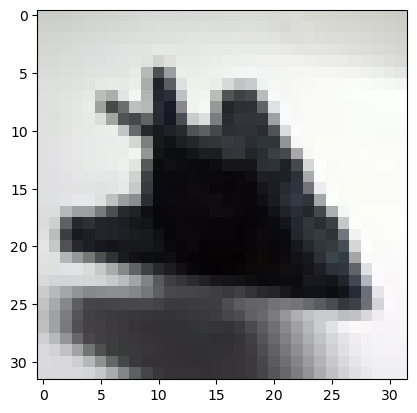

In [14]:
show_example(*dataset[0])

Label:  airplane (0)


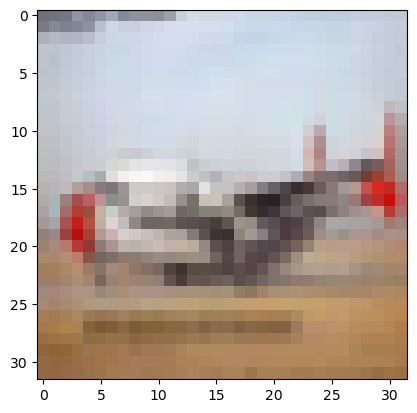

In [15]:
show_example(*dataset[1099])

## Training and Validation Dataset

In [16]:
random_seed= 42
torch.manual_seed(random_seed);

In [17]:
val_size=5000
train_size= len(dataset) - val_size
train_ds, val_ds = random_split(dataset,[train_size,val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [18]:
from torch.utils.data.dataloader import DataLoader
batch_size=128

In [19]:
train_dl=DataLoader(train_ds, 
                    batch_size, 
                    shuffle=True, 
                    num_workers=8, 
                    pin_memory=True)
val_dl=DataLoader(val_ds,
                  batch_size*2,
                  num_workers=8,
                  pin_memory=True)

In [20]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images,labels in dl:
        fig,ax=plt.subplots(figsize=(24,8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break

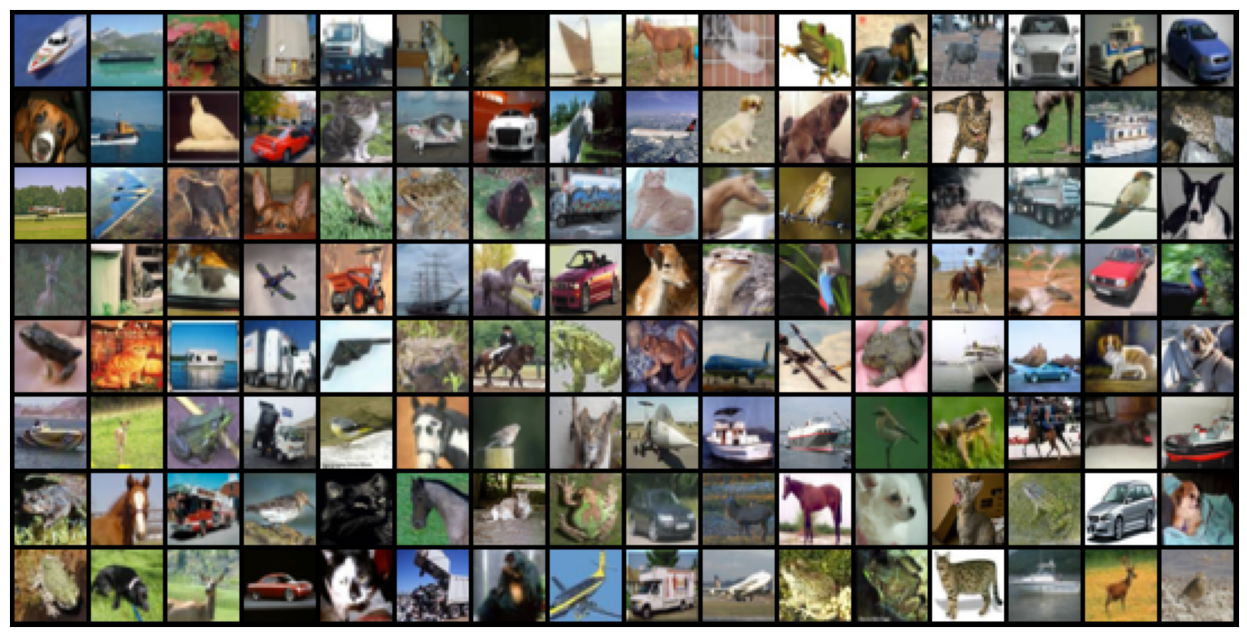

In [21]:
show_batch(train_dl)

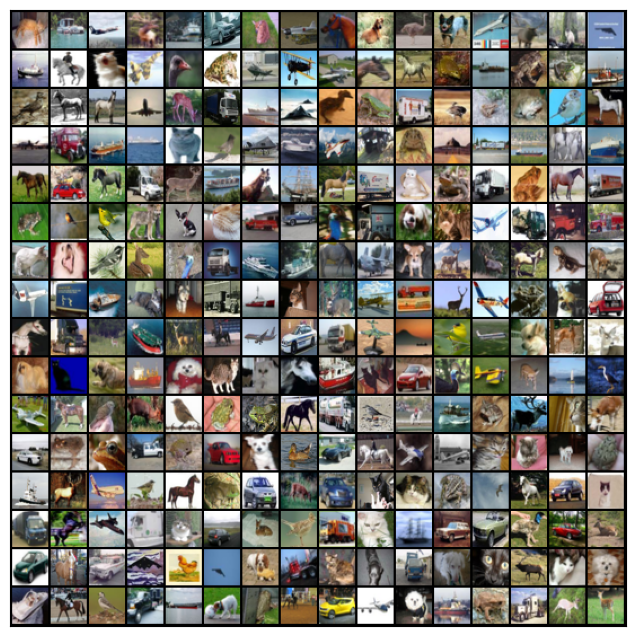

In [22]:
show_batch(val_dl)

### Implement a convolution operation on a 1 channel image with 3x3 Kernal

In [23]:
def apply_kernel(image,kernel):
    ri,ci = image.shape
    rk,ck = kernel.shape
    ro,co = ri-rk+1, ci-ck+1
    output = torch.zeros([ro,co])
    for i in range(ro):
        for j in range(co):
            output[i,j]=torch.sum(image[i:i+rk,j:j+ck]*kernel)
    return output

In [24]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

### Model Building

In [25]:
from torch import nn
import torch.nn.functional as F

In [26]:
conv=nn.Conv2d(3,8,kernel_size=3, stride=1, padding=1)

In [27]:
pool=nn.MaxPool2d(2,2)

In [28]:
for images,labels in train_dl:
    print("Images shape",images.shape)
    out = conv(images)
    out = pool(out)
    print("Out shape",out.shape)
    break

Images shape torch.Size([128, 3, 32, 32])
Out shape torch.Size([128, 8, 16, 16])


In [29]:
conv.weight[1]

tensor([[[-0.1356,  0.1519, -0.0803],
         [-0.1281,  0.0853,  0.1624],
         [ 0.0438,  0.1575, -0.0313]],

        [[-0.1402,  0.0774, -0.0561],
         [-0.0485, -0.1848,  0.0140],
         [-0.0902, -0.0311,  0.0133]],

        [[-0.1269,  0.1138,  0.1813],
         [-0.0442, -0.1534,  0.0476],
         [-0.0057, -0.1522,  0.0428]]], grad_fn=<SelectBackward0>)

In [30]:
class ImageClassificationBase(nn.Module):
    def training_step(self,batch):
        images,labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        return loss

    def validation_step(self,batch):
        images,labels=batch
        out=self(images)
        loss=F.cross_entropy(out,labels)
        acc=accuracy(out,labels)
        return {'val_loss':loss.detach(), 'val_acc':acc}
        
    def validation_epoch_end(self,outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}
        
    def epoch_end(self,epoch,result):
        print(f"Epoch {epoch} , val_loss: {result['val_loss']} , val_acc: {result['val_acc']}")

def accuracy(outputs, labels):
    _,preds = torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

### Define ths Cifar10 CNN Model

In [31]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            # Input: 3x 32 x 32
            nn.Conv2d(3,32,kernel_size=3, padding=1),
            # Output : 32 x 32 x 32
            nn.ReLU(),
            nn.Conv2d(32,64,kernel_size=3, stride=1, padding=1),
            # Output : 64 x 32 x 32
            nn.ReLU(),
            nn.MaxPool2d(2,2), #Output: 64 x 16 x 16
            nn.Conv2d(64,128,kernel_size=3, stride=1, padding=1),
            # Output : 128 x 16 x16
            nn.ReLU(),
            nn.Conv2d(128,128, kernel_size=3, stride=1,padding=1),
            # Output : 128 x 16 x 16
            nn.ReLU(),
            nn.MaxPool2d(2,2), #Output: 128 x 8 x 8
            nn.Conv2d(128,256,kernel_size=3, stride=1, padding=1),
            # Output : 256 x 8 x 8
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size=3, stride=1, padding=1),
            # Output : 256 x 8 x 8
            nn.ReLU(),
            nn.MaxPool2d(2,2), #Output=256 x 4 x 4
            nn.Flatten(),
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512,10))
        
    def forward(self,xb):
        return self.network(xb)

In [32]:
model = Cifar10CnnModel()

In [33]:
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [34]:
for images,labels in train_dl:
    print("Images.shape:", images.shape)
    out= model(images)
    print("out.shape:",out.shape)
    print("out[0]:", out[0])
    break

Images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])
out[0]: tensor([ 0.0269,  0.0142, -0.0089, -0.0402, -0.0177, -0.0444,  0.0414, -0.0070,
         0.0265,  0.0070], grad_fn=<SelectBackward0>)


In [35]:
def get_default_device():
    """ Pick GPU if available else cpu"""
    if torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")
def to_device(data,device):
    """ Move tensor to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device, non_blocking= True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self,dl,device):
        self.dl=dl
        self.device=device

    def __iter__(self):
        """Yield a batch data after moving it to device"""
        for b in self.dl:
            yield to_device(b,self.device)
    def __len__(self):
        """Number of batches"""
        return len(self.dl)        

In [36]:
device = get_default_device()
device

device(type='cuda')

In [37]:
train_dl= DeviceDataLoader(train_dl,device)
val_dl= DeviceDataLoader(val_dl,device)
to_device(model,device)

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [43]:
@torch.no_grad()
def evaluate(model,val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model,train_loader, val_loader, opt_func=torch.optim.SGD):
    history=[]
    optimizer = opt_func(model.parameters(), lr)
    for epoch in  range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch,result)
        history.append(result)
    return history

In [39]:
model = to_device(Cifar10CnnModel(),device)

In [44]:
evaluate(model,val_dl)

{'val_loss': 1.432576060295105, 'val_acc': 0.47211629152297974}

In [41]:
num_epochs=10
opt_func=torch.optim.Adam
lr = 0.001

In [45]:
history =  fit(num_epochs, lr, model, train_dl, val_dl,opt_func)

Epoch 0 , val_loss: 1.1715242862701416 , val_acc: 0.5745519399642944
Epoch 1 , val_loss: 0.9890567660331726 , val_acc: 0.6492646932601929
Epoch 2 , val_loss: 0.8569830060005188 , val_acc: 0.697346031665802
Epoch 3 , val_loss: 0.7820603847503662 , val_acc: 0.732341468334198
Epoch 4 , val_loss: 0.7725897431373596 , val_acc: 0.7443819046020508
Epoch 5 , val_loss: 0.7223593592643738 , val_acc: 0.7613281011581421
Epoch 6 , val_loss: 0.7674488425254822 , val_acc: 0.7518956661224365
Epoch 7 , val_loss: 0.7900370955467224 , val_acc: 0.761523425579071
Epoch 8 , val_loss: 0.836769700050354 , val_acc: 0.7615693807601929
Epoch 9 , val_loss: 0.8469277620315552 , val_acc: 0.769255518913269


In [48]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs No. of Epochs')

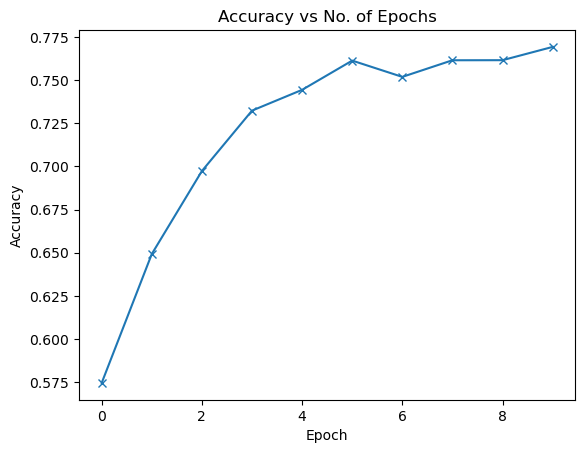

In [49]:
plot_accuracies(history)

In [50]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel("epoch")
    plt.ylabel('loss')
    plt.legend(['Training','Validation'])
    plt.title('Loss vs No. of epochs');

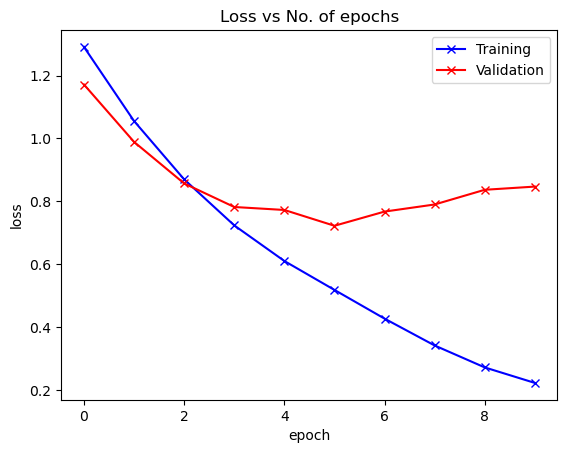

In [51]:
plot_losses(history)

### Testing with Individual Images

In [52]:
test_dataset =  ImageFolder(data_dir+'/test',transform=ToTensor())

In [55]:
def predict_image(img,model):
    # Convert to a batch of 1
    xb= to_device(img.unsqueeze(0),device)
    # Get predictions from model
    yb= model(xb)
    # pick index with highest probability
    _,preds= torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: airplane ,Predicted:  airplane


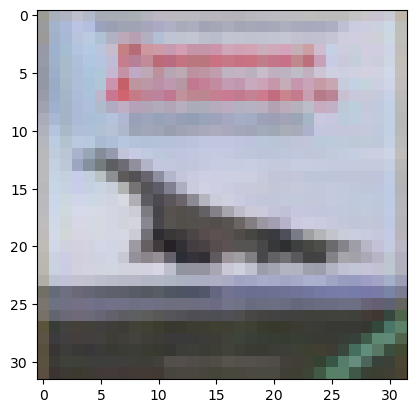

In [57]:
img,label = test_dataset[0]
plt.imshow(img.permute(1,2,0))
print("Label:",dataset.classes[label],",Predicted: ",predict_image(img,model))

Label: automobile ,Predicted:  automobile


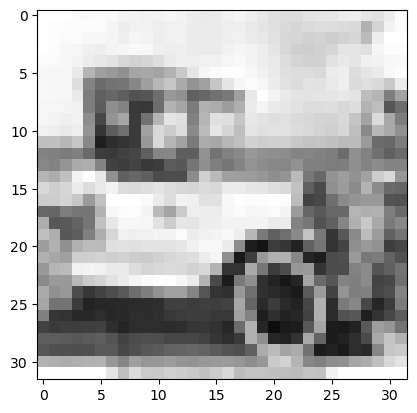

In [58]:
img,label = test_dataset[1002]
plt.imshow(img.permute(1,2,0))
print("Label:",dataset.classes[label],",Predicted: ",predict_image(img,model))

Label: frog ,Predicted:  frog


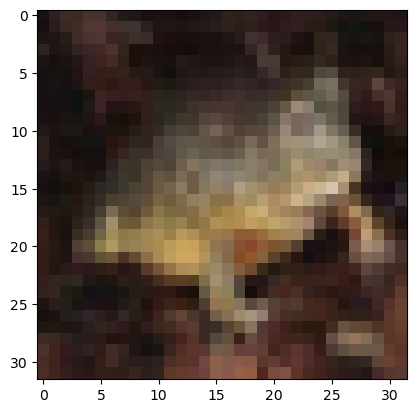

In [59]:
img,label = test_dataset[6153]
plt.imshow(img.permute(1,2,0))
print("Label:",dataset.classes[label],",Predicted: ",predict_image(img,model))

In [60]:
test_loader = DeviceDataLoader(DataLoader(test_dataset,batch_size*2),device)
result = evaluate(model,test_loader)
result

{'val_loss': 0.8400413393974304, 'val_acc': 0.771484375}

### Saving and loading the model

In [61]:
torch.save(model.state_dict(), 'cifar10-cnn.pth')

In [63]:
model2= to_device(Cifar10CnnModel(), device)

In [64]:
model2.load_state_dict(torch.load('cifar10-cnn.pth'))

<All keys matched successfully>

In [66]:
evaluate(model2,test_loader)

{'val_loss': 0.8400413393974304, 'val_acc': 0.771484375}